<a href="https://colab.research.google.com/github/Angana007/machine_learning_classwork/blob/main/classwork_online_gaming_behaviour_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from itertools import cycle

In [3]:
!wget https://raw.githubusercontent.com/SimplyLearner/Dataset/master/online_gaming_behavior_dataset.csv

--2024-09-04 06:05:01--  https://raw.githubusercontent.com/SimplyLearner/Dataset/master/online_gaming_behavior_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2849678 (2.7M) [text/plain]
Saving to: ‘online_gaming_behavior_dataset.csv’

online_gaming_behav 100%[===================>]   2.72M  10.8MB/s    in 0.3s    

2024-09-04 06:05:02 (10.8 MB/s) - ‘online_gaming_behavior_dataset.csv’ saved [2849678/2849678]



In [4]:
# Load the dataset
data_df = pd.read_csv('online_gaming_behavior_dataset.csv')
data_df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [5]:
data_df.shape

(40034, 13)

In [7]:
# Checking for missing values
data_df.isnull().sum()

,0
PlayerID,0
Age,0
Gender,0
Location,0
GameGenre,0
PlayTimeHours,0
InGamePurchases,0
GameDifficulty,0
SessionsPerWeek,0
AvgSessionDurationMinutes,0


In [6]:
data_df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [8]:
# Distribution of the target variable
data_df['EngagementLevel'].value_counts()

,count
EngagementLevel,
Medium,19374
High,10336
Low,10324


In [9]:
target_column = 'EngagementLevel'
X = data_df.drop(columns=[target_column])
y = data_df[target_column]

In [10]:
# Convert categorical string variables to numerical values
categorical_columns = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Create dummies for other categorical variables if any
X = pd.get_dummies(X, drop_first=True)

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [12]:
# Apply StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Applying Naive Bayes algorithm to the dataset

In [13]:
# Import Required Libraries and apply Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_sc, y_train)

# Predict on testing set
y_pred_nb = nb_model.predict(X_test_sc)
y_pred_prob_nb = nb_model.predict_proba(X_test_sc)

In [14]:
# Determine the class order
class_order = nb_model.classes_
print("Class order:", class_order)

# Create a DataFrame to display actual and predicted labels with probabilities
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_nb,
})

# Add predicted probabilities with correct class names
for i, class_name in enumerate(class_order):
    results_df[f'Predicted Probability {class_name}'] = np.round(y_pred_prob_nb[:, i], 2)

# Display the first few rows of the results DataFrame
results_df.head()

Class order: ['High' 'Low' 'Medium']


,Actual Label,Predicted Label,Predicted Probability High,Predicted Probability Low,Predicted Probability Medium
34667,Medium,Medium,0.22,0.07,0.71
22227,Medium,Medium,0.19,0.17,0.64
24899,Medium,Medium,0.01,0.34,0.65
35415,Medium,Medium,0.22,0.16,0.62
21440,Medium,Medium,0.34,0.13,0.53


In [15]:
print("\nNaive Bayes Classifier:")
training_accuracy =  accuracy_score(y_train, nb_model.predict(X_train_sc))
testing_accuracy = accuracy_score(y_test, y_pred_nb)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")


Naive Bayes Classifier:
Training Accuracy: 0.8447960033305578
Testing Accuracy: 0.8434494817035094


The results suggest that the Naive Bayes model is performing well on both the training and testing data. It's a good indicator that the model can effectively classify new instances based on the patterns learned from the training data.

In [16]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb, labels=class_order)
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix with labels
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_order, columns=class_order)
print("Confusion Matrix with Class Labels:")
print(conf_matrix_df)


Confusion Matrix:
[[3234  109  814]
 [  96 2854 1133]
 [ 129  226 7419]]
Confusion Matrix with Class Labels:
        High   Low  Medium
High    3234   109     814
Low       96  2854    1133
Medium   129   226    7419


The model is performing exceptionally well in classifying "Medium" instances, with a high accuracy of 95.4%.


*   High: (3234 / 4157) * 100% ≈ 77.7%
*   Low: (2854 / 4083) * 100% ≈ 69.8%
*   Medium: (7419 / 7774) * 100% ≈ 95.4%




In [17]:
# Print classification report
Class_report = classification_report(y_test, y_pred_nb)
print("Naïve Bayes Classification Report:")
print(Class_report)

Naïve Bayes Classification Report:
              precision    recall  f1-score   support

        High       0.93      0.78      0.85      4157
         Low       0.89      0.70      0.78      4083
      Medium       0.79      0.95      0.87      7774

    accuracy                           0.84     16014
   macro avg       0.87      0.81      0.83     16014
weighted avg       0.86      0.84      0.84     16014



Key Observations:
Overall Accuracy: The overall accuracy of 0.84 (84%) is a good indication of the model's overall performance.

Class-wise Performance:
*   High: The model has a high precision of 0.93, meaning that when it
predicts a class as "High," it's likely correct. However, the recall of 0.78 suggests that it might be missing some "High" instances.

*   Low: The model has a lower precision and recall for the "Low" class, indicating that it might be misclassifying some instances as "Low" or missing some actual "Low" instances.

*   Medium: The model has a high recall of 0.95, meaning it's good at identifying "Medium" instances. However, the precision of 0.79 suggests that it might be misclassifying some instances as "Medium" that are actually "High" or "Low."

Potential Areas for Improvement:

*   Low Class: The "Low" class seems to be the most challenging for the model. It might be worth investigating whether there are any specific features or patterns that are causing the model to misclassify these instances.

*   Class Imbalance: If the classes are imbalanced, the model might be biased towards the majority class. Techniques like oversampling or undersampling can help address this issue.

*   Feature Engineering: Exploring new features or transforming existing ones might improve the model's ability to differentiate between classes.

*   Model Selection: While Naive Bayes is a simple and effective algorithm, exploring other models like Random Forest or Support Vector Machines might yield better results, especially if the data is complex or non-linear.

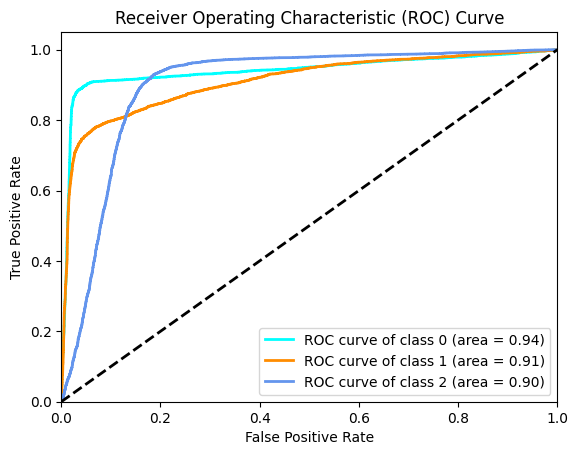

In [18]:
# Check if more than one class is present in y_test
if len(set(y_test)) > 1:
    # Plot ROC curve
    y_test_binarized = label_binarize(y_test, classes=nb_model.classes_)
    n_classes = y_test_binarized.shape[1]

    y_score = nb_model.predict_proba(X_test_sc)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_score[:, i])

    # Plotting the ROC curves
    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC AUC score is not defined as only one class is present in y_true.")

The Naive Bayes performs exceptionally well for all classes, with AUC values ranging from 0.90 to 0.94. The model is best at classifying instances of Class 0, followed closely by Class 1, and then Class 2.

# Applying K-Nearest Neighbors on Online Gaming Behavior Dataset


In [19]:
#Import Required Libraries and apply K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_sc, y_train)

# Predict on testing set
y_pred_knn = knn_model.predict(X_test_sc)
y_pred_prob_knn = knn_model.predict_proba(X_test_sc)

In [20]:
# Determine the class order
class_order = knn_model.classes_
print("Class order:", class_order)

# Create a DataFrame to display actual and predicted labels with probabilities
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_knn,
})

# Add predicted probabilities with correct class names
for i, class_name in enumerate(class_order):
    results_df[f'Predicted Probability {class_name}'] = np.round(y_pred_prob_knn[:, i], 2)

# Display the first few rows of the results DataFrame
results_df.head()

Class order: ['High' 'Low' 'Medium']


,Actual Label,Predicted Label,Predicted Probability High,Predicted Probability Low,Predicted Probability Medium
34667,Medium,Medium,0.00,0.00,1.00
22227,Medium,High,0.67,0.00,0.33
24899,Medium,Low,0.00,0.67,0.33
35415,Medium,Medium,0.33,0.00,0.67
21440,Medium,Medium,0.33,0.00,0.67


In [21]:
# Calculate training and testing accuracy
print("\nK-Nearest Neighbors Classification")
training_accuracy =  accuracy_score(y_train, knn_model.predict(X_train_sc))
testing_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")


K-Nearest Neighbors Classification
Training Accuracy: 0.8572855953372189
Testing Accuracy: 0.7141875858623704


The inference from the given K-Nearest Neighbors (KNN) Classifier results is that the model is showing signs of overfitting.

In [22]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn, labels=class_order)
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix with labels
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_order, columns=class_order)
print("Confusion Matrix with Class Labels:")
print(conf_matrix_df)

Confusion Matrix:
[[3049  132  976]
 [ 255 2360 1468]
 [ 975  771 6028]]
Confusion Matrix with Class Labels:
        High   Low  Medium
High    3049   132     976
Low      255  2360    1468
Medium   975   771    6028


In [23]:
# Print classification report
Class_report = classification_report(y_test, y_pred_knn)
print("K-Nearest Neighbors Classification Report:")
print(Class_report)

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

        High       0.71      0.73      0.72      4157
         Low       0.72      0.58      0.64      4083
      Medium       0.71      0.78      0.74      7774

    accuracy                           0.71     16014
   macro avg       0.72      0.70      0.70     16014
weighted avg       0.71      0.71      0.71     16014



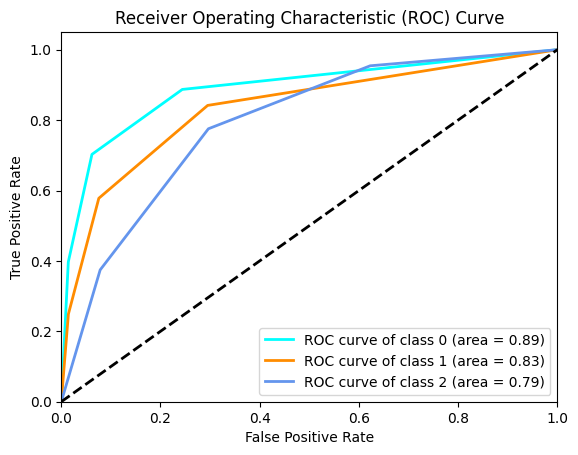

In [24]:
# Check if more than one class is present in y_test
if len(set(y_test)) > 1:
    # Plot ROC curve
    y_test_binarized = label_binarize(y_test, classes=knn_model.classes_)
    n_classes = y_test_binarized.shape[1]

    y_score = knn_model.predict_proba(X_test_sc)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_score[:, i])

    # Plotting the ROC curves
    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC AUC score is not defined as only one class is present in y_true.")

The k-NN classifier performs reasonably well for all classes, with AUC values ranging from 0.79 to 0.89.

# **Applying Decision Tree on Online Gaming Behavior Dataset**

In [25]:
#Import Required Libraries and apply decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_sc, y_train)

# Predict on testing set
y_pred_dt = dt_model.predict(X_test_sc)
y_pred_prob_dt = dt_model.predict_proba(X_test_sc)

In [26]:
# Determine the class order
class_order = dt_model.classes_
print("Class order:", class_order)

# Create a DataFrame to display actual and predicted labels with probabilities
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_dt,
})

# Add predicted probabilities with correct class names
for i, class_name in enumerate(class_order):
    results_df[f'Predicted Probability {class_name}'] = np.round(y_pred_prob_dt[:, i], 2)

# Display the first few rows of the results DataFrame
results_df.head()

Class order: ['High' 'Low' 'Medium']


,Actual Label,Predicted Label,Predicted Probability High,Predicted Probability Low,Predicted Probability Medium
34667,Medium,Medium,0.0,0.0,1.0
22227,Medium,Medium,0.0,0.0,1.0
24899,Medium,High,1.0,0.0,0.0
35415,Medium,Medium,0.0,0.0,1.0
21440,Medium,Medium,0.0,0.0,1.0


In [27]:
## Calculate training and testing accuracy
print("\nDecision Tree Classifier:")
training_accuracy =  accuracy_score(y_train, dt_model.predict(X_train_sc))
testing_accuracy = accuracy_score(y_test, y_pred_dt)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")


Decision Tree Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.8285250405894842


The high training accuracy and low testing accuracy suggest that the decision tree model is overfitting.

In [28]:
# Cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_model, X_train_sc, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.83180683 0.82618651 0.83409659 0.82847627 0.82285595]
Mean cross-validation score: 0.828684429641965


The inference from the cross-validation scores and mean cross-validation score is that the model's performance is relatively consistent across different folds of the data.

In [29]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt, labels=class_order)
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix with labels
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_order, columns=class_order)
print("Confusion Matrix with Class Labels:")
print(conf_matrix_df)

Confusion Matrix:
[[3362  285  510]
 [ 290 3275  518]
 [ 559  584 6631]]
Confusion Matrix with Class Labels:
        High   Low  Medium
High    3362   285     510
Low      290  3275     518
Medium   559   584    6631


In [30]:
# Print classification report
Class_report = classification_report(y_test, y_pred_dt)
print("Decision Trees Classification Report:")
print(Class_report)

Decision Trees Classification Report:
              precision    recall  f1-score   support

        High       0.80      0.81      0.80      4157
         Low       0.79      0.80      0.80      4083
      Medium       0.87      0.85      0.86      7774

    accuracy                           0.83     16014
   macro avg       0.82      0.82      0.82     16014
weighted avg       0.83      0.83      0.83     16014



The confusion matrix and classification report show that while the model performs well overall, there are some misclassifications. While Decision Trees are a simple and effective algorithm, exploring other models like Random Forest or Support Vector Machines might yield better results.

# Random Forest

## Benefits of Random Forest:

**Reduces Overfitting:** Averaging the results of multiple decision trees reduces the risk of overfitting seen with a single Decision Tree.

**Improves Generalization:** The combined predictions from multiple trees enhance the model’s ability to generalize to new, unseen data.

**More Robust Predictions:** Random Forest is more robust to noise and variability in the training data.


In [31]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_sc, y_train)

# Predict on testing set
y_pred_rf = rf_model.predict(X_test_sc)
y_pred_prob_rf = rf_model.predict_proba(X_test_sc)

In [32]:
# Determine the class order
class_order = rf_model.classes_
print("Class order:", class_order)

# Create a DataFrame to display actual and predicted labels with probabilities
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_rf,
})

# Add predicted probabilities with correct class names
for i, class_name in enumerate(class_order):
    results_df[f'Predicted Probability {class_name}'] = np.round(y_pred_prob_rf[:, i], 2)

# Display the first few rows of the results DataFrame
results_df.head()

Class order: ['High' 'Low' 'Medium']


,Actual Label,Predicted Label,Predicted Probability High,Predicted Probability Low,Predicted Probability Medium
34667,Medium,Medium,0.08,0.05,0.87
22227,Medium,Medium,0.08,0.04,0.88
24899,Medium,Low,0.06,0.79,0.15
35415,Medium,Medium,0.13,0.06,0.81
21440,Medium,Medium,0.17,0.07,0.76


In [33]:
## Calculate training and testing accuracy
print("\nRandom Forest Classifier:")
training_accuracy =  accuracy_score(y_train, rf_model.predict(X_train_sc))
testing_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")


Random Forest Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.9098288997127514


In [34]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf, labels=class_order)
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix with labels
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_order, columns=class_order)
print("Confusion Matrix with Class Labels:")
print(conf_matrix_df)

Confusion Matrix:
[[3612  131  414]
 [ 114 3584  385]
 [ 176  224 7374]]
Confusion Matrix with Class Labels:
        High   Low  Medium
High    3612   131     414
Low      114  3584     385
Medium   176   224    7374


In [35]:
# Print classification report
Class_report = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(Class_report)

Random Forest Classification Report:
              precision    recall  f1-score   support

        High       0.93      0.87      0.90      4157
         Low       0.91      0.88      0.89      4083
      Medium       0.90      0.95      0.92      7774

    accuracy                           0.91     16014
   macro avg       0.91      0.90      0.90     16014
weighted avg       0.91      0.91      0.91     16014

